<div style="display:block">
    <div style="width: 10%; display: inline-block; text-align: left;">
        <img src="http://upload.wikimedia.org/wikipedia/en/0/0c/Mu_Sigma_Logo.jpg" style="height:75px; margin-left:0px" />
    </div>
    <div style="width: 69%; display: inline-block">
        <h5  style="color:maroon; text-align: center; font-size:25px;">Exploratory Data Analysis for Verbatim</h5>
    </div>
    <div style="width: 20%; text-align: right; display: inline-block;">
        <div style="width: 100%; text-align: left; display: inline-block;">
            <i>Modified: Sep 6th, 2024</i>
        </div>
    </div>
</div>

***
***
<a name="intro"></a>
# Introduction

Exploratory Data Analysis (EDA) is a critical process in data analytics that helps us understand the data we're working with. It involves __exploring__ and __summarizing__ the data's key features, often through visualizations, __to uncover patterns, spot anomalies, and identify relationships__. EDA is essential because it allows us to make informed decisions on how to approach further analysis or modeling, ensuring that our insights are based on a solid understanding of the data.


## Importing libraries

In [61]:
!pip install wordcloud

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from wordcloud import WordCloud
from math import pi

## Importing dataset

In [66]:


df = pd.read_excel('Verbatim.xlsx', dtype={'TicketNumber': str})


***

## Understanding the dataset

In [67]:
df.head()

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8
0,Created Month,Ticket Number,Title,Verbatim,Agent Alias,Support Area Path,Rating,Is Strategic?
1,2023-03-01 00:00:00,2303291420000010,Yealink Teams Rooms Sign In Issue Cannot Conne...,Délai {namepii} traitement 1 mois d'échanges +...,ava_ceb_reagb,Teams/Teams Devices (OEM Only)/MTR,1,No
2,2023-05-01 00:00:00,2305230060003330,Room panels are not syncing with the resource ...,The support team did not give us a proper reso...,yiliu5,Teams/Teams Devices (OEM Only)/MTR,1,Yes
3,2023-06-01 00:00:00,2306300050002650,When a MTR joins a Zoom call via {ADDRESSPII} ...,The case was raised for more than 2 months and...,maa_tuc_raram,Teams/Teams Devices (OEM Only)/MTR,1,No
4,2023-07-01 00:00:00,2307050060003170,OEM – MTR -A Neat {NAMEPII} Not Receiving Vide...,I would like to note that I got some terrible ...,mdt_hyd_akasr_css,Teams/Teams Devices (OEM Only)/MTR,1,No


In [68]:
df.shape

(324, 8)

In [69]:
df.columns

Index(['Column 1', 'Column 2', 'Column 3', 'Column 4', 'Column 5', 'Column 6',
       'Column 7', 'Column 8'],
      dtype='object')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Column 1  324 non-null    object
 1   Column 2  324 non-null    object
 2   Column 3  324 non-null    object
 3   Column 4  324 non-null    object
 4   Column 5  324 non-null    object
 5   Column 6  324 non-null    object
 6   Column 7  324 non-null    object
 7   Column 8  324 non-null    object
dtypes: object(8)
memory usage: 20.4+ KB


#### The info provides a concise summary of a DataFrame’s structure and contents. It returns the column dtypes and non-null values count for each column

In [71]:
print(df.dtypes)

Column 1    object
Column 2    object
Column 3    object
Column 4    object
Column 5    object
Column 6    object
Column 7    object
Column 8    object
dtype: object


#### It displays the data types of each column in the DataFrame df.

## Data Cleaning and Preparation

### Checking for Null Values

In [72]:
df.isna().sum()

Column 1    0
Column 2    0
Column 3    0
Column 4    0
Column 5    0
Column 6    0
Column 7    0
Column 8    0
dtype: int64

#### This calculates and displays the total number of missing or NULL values in each column of the DataFrame df.
We can see that __there are no NULL values__ in the dataframe df.

### Data Type Conversion

In [73]:
# Load the Excel file again, skipping the first row, which seems to contain column headers
df = pd.read_excel('Verbatim.xlsx', skiprows=1)

# Rename the columns for clarity
df.columns = ['Created Month', 'Ticket Number', 'Title', 'Verbatim', 'Agent Alias', 'Support Area Path', 'Rating', 'Is Strategic?']

# Now convert 'Created Month' to datetime
df['Created Month'] = pd.to_datetime(df['Created Month'], errors='coerce')

# Check the first few rows to ensure the conversion worked
df.head()


,Created Month,Ticket Number,Title,Verbatim,Agent Alias,Support Area Path,Rating,Is Strategic?
0,2023-03-01,2303291420000010,Yealink Teams Rooms Sign In Issue Cannot Conne...,Délai {namepii} traitement 1 mois d'échanges +...,ava_ceb_reagb,Teams/Teams Devices (OEM Only)/MTR,1,No
1,2023-05-01,2305230060003330,Room panels are not syncing with the resource ...,The support team did not give us a proper reso...,yiliu5,Teams/Teams Devices (OEM Only)/MTR,1,Yes
2,2023-06-01,2306300050002650,When a MTR joins a Zoom call via {ADDRESSPII} ...,The case was raised for more than 2 months and...,maa_tuc_raram,Teams/Teams Devices (OEM Only)/MTR,1,No
3,2023-07-01,2307050060003170,OEM – MTR -A Neat {NAMEPII} Not Receiving Vide...,I would like to note that I got some terrible ...,mdt_hyd_akasr_css,Teams/Teams Devices (OEM Only)/MTR,1,No
4,2023-07-01,2307140050000640,Poly X50 cannot connect to Microsoft Teams Room,Basically no help received from Microsoft side...,shr_mtl_rayad,Teams/Teams Devices (OEM Only)/MTR,1,No


In [74]:
df['Is Strategic?'] = df['Is Strategic?'].map({'Yes': 1, 'No': 0})

In [75]:
print(df.dtypes)

Created Month        datetime64[ns]
Ticket Number                 int64
Title                        object
Verbatim                     object
Agent Alias                  object
Support Area Path            object
Rating                        int64
Is Strategic?                 int64
dtype: object


Converted the  'Created Month' column to datetime format for __time-based analysis__ and mapped 'Is Strategic?' column  values to binary __for easier processing and analysis)__.

### Handling Duplicates

In [76]:
duplicates = df.duplicated()

if duplicates.any():
    print("Duplicate rows found")
    print(df[duplicates])
else:
    print("No duplicates found")

No duplicates found


In [77]:
df.loc[df.duplicated()]

,Created Month,Ticket Number,Title,Verbatim,Agent Alias,Support Area Path,Rating,Is Strategic?


Looked for duplicate rows and found __no duplicate rows__ in the dataframe df

### Identifying Categorical Columns

In [78]:
categorical_list = [x for x in df.columns if df[x].dtype =='object']
print("Categorical Variables:")
for x in categorical_list:
    print(x)

Categorical Variables:
Title
Verbatim
Agent Alias
Support Area Path


Identifying the Categorical Columns for __understanding the structure of the data__ and __selecting appropriate preprocessing or analysis methods__ for these categorical features

### Text Standardization

In [79]:
text_columns = ['Title', 'Verbatim']
for col in text_columns:
    df[col] = df[col].str.lower()

In [80]:
df.head()

,Created Month,Ticket Number,Title,Verbatim,Agent Alias,Support Area Path,Rating,Is Strategic?
0,2023-03-01,2303291420000010,yealink teams rooms sign in issue cannot conne...,délai {namepii} traitement 1 mois d'échanges +...,ava_ceb_reagb,Teams/Teams Devices (OEM Only)/MTR,1,0
1,2023-05-01,2305230060003330,room panels are not syncing with the resource ...,the support team did not give us a proper reso...,yiliu5,Teams/Teams Devices (OEM Only)/MTR,1,1
2,2023-06-01,2306300050002650,when a mtr joins a zoom call via {addresspii} ...,the case was raised for more than 2 months and...,maa_tuc_raram,Teams/Teams Devices (OEM Only)/MTR,1,0
3,2023-07-01,2307050060003170,oem – mtr -a neat {namepii} not receiving vide...,i would like to note that i got some terrible ...,mdt_hyd_akasr_css,Teams/Teams Devices (OEM Only)/MTR,1,0
4,2023-07-01,2307140050000640,poly x50 cannot connect to microsoft teams room,basically no help received from microsoft side...,shr_mtl_rayad,Teams/Teams Devices (OEM Only)/MTR,1,0


Converting the text in columns 'Title' and 'Verbatim' to ensure __consistency__ and facilitate __case-insensitive text processing or analysis__.

### Finding Unique Support Area Paths

In [81]:
unique_support_area_paths = df['Support Area Path'].unique()

unique_support_area_paths_list = list(unique_support_area_paths)

print("Unique Support Area Paths:")
for path in unique_support_area_paths_list:
    print(path)

Unique Support Area Paths:
Teams/Teams Devices (OEM Only)/MTR
Teams/Teams Devices/Msft Teams Rooms Android (MTRA)
Teams/Teams Devices/Msft Teams Rooms Windows (MTRW)
Teams/Teams Devices/MTR Pro
Teams/Teams Devices/Surface Hub
Teams/Teams Devices/Teams Device Management (TAC)
Teams/Teams Devices/Teams Displays
Teams/Teams Devices/Teams Panels
Teams/Teams Devices/Teams Phones (Desk & Conference Phones)
Teams/Teams Devices (OEM Only)/Other Teams Devices


### Renaming for Better Readability

In [82]:
mapping_dict = {
    'Teams/Teams Devices (OEM Only)/MTR': 'Teams Rooms',
    'Teams/Teams Devices/Msft Teams Rooms Android (MTRA)': 'Teams Rooms Android',
    'Teams/Teams Devices/Msft Teams Rooms Windows (MTRW)': 'Teams Rooms Windows',
    'Teams/Teams Devices/MTR Pro': 'Teams Devices MTR Pro',
    'Teams/Teams Devices/Surface Hub': 'Surface Hub',
    'Teams/Teams Devices/Teams Device Management (TAC)': 'Device Management',
    'Teams/Teams Devices/Teams Displays': 'Teams Displays',
    'Teams/Teams Devices/Teams Panels': 'Teams Panels',
    'Teams/Teams Devices/Teams Phones (Desk & Conference Phones)': 'Teams Phones',
    'Teams/Teams Devices (OEM Only)/Other Teams Devices': 'Other Teams Devices'
}

df['Support Area Path'] = df['Support Area Path'].replace(mapping_dict)

df.to_csv('Updated Verbatim Data.csv', index=False)

df.head()

,Created Month,Ticket Number,Title,Verbatim,Agent Alias,Support Area Path,Rating,Is Strategic?
0,2023-03-01,2303291420000010,yealink teams rooms sign in issue cannot conne...,délai {namepii} traitement 1 mois d'échanges +...,ava_ceb_reagb,Teams Rooms,1,0
1,2023-05-01,2305230060003330,room panels are not syncing with the resource ...,the support team did not give us a proper reso...,yiliu5,Teams Rooms,1,1
2,2023-06-01,2306300050002650,when a mtr joins a zoom call via {addresspii} ...,the case was raised for more than 2 months and...,maa_tuc_raram,Teams Rooms,1,0
3,2023-07-01,2307050060003170,oem – mtr -a neat {namepii} not receiving vide...,i would like to note that i got some terrible ...,mdt_hyd_akasr_css,Teams Rooms,1,0
4,2023-07-01,2307140050000640,poly x50 cannot connect to microsoft teams room,basically no help received from microsoft side...,shr_mtl_rayad,Teams Rooms,1,0


Found unique support area paths and standardized the paths into broader and more manageable categories, to __simplify and categorize__ detailed support paths into more general and actionable categories, making the __data easier to analyze and interpret.__

## Descriptive Statistics

### Customer Rating Analysis

In [83]:
mean_rating = df['Rating'].mean()
median_rating = df['Rating'].median()
mode_rating = df['Rating'].mode()[0]
std_dev_rating = df['Rating'].std()

print(f"Mean Customer Rating: {mean_rating}")
print(f"Median Customer Rating: {median_rating}")
print(f"Mode Customer Rating: {mode_rating}")
print(f"Standard Deviation of Customer Rating: {std_dev_rating}")

Mean Customer Rating: 1.6160990712074303
Median Customer Rating: 1.0
Mode Customer Rating: 1
Standard Deviation of Customer Rating: 0.8044833318025943


`Inference`

1. **Mean Customer Rating**: 1.62 indicates the average rating is slightly above 1, suggesting a generally low rating overall.

2. **Median Customer Rating**: 1.0 shows that the middle value of the ratings is 1, which aligns with the mean being close to this value, reinforcing that most ratings are likely low.

3. **Mode Customer Rating**: 1 is the most frequently occurring rating, confirming that the majority of the ratings are 1.

4. **Standard Deviation**: 0.80 indicates some variability in the ratings, though it’s relatively low, meaning the ratings are clustered around the mean but with some spread.

Overall, the data suggests that customer ratings are predominantly low with minimal variation around this low value.

In [84]:
print(df.Rating.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    323.000000
mean       1.616099
std        0.804483
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
85%        3.000000
90%        3.000000
100%       3.000000
max        3.000000
Name: Rating, dtype: float64


`Inference`

- **Most Ratings**: The majority of ratings are either 1 or 2, with a few higher ratings.
- **Quartiles**: 25% and 50% of ratings are 1, indicating low ratings are common.
- **Higher Percentiles**: Ratings increase to 3 at the 85th and 90th percentiles, but no ratings exceed 3.
- **Spread**: The standard deviation (0.80) reflects moderate variability, but the data is still centered around the lower ratings. 

Overall, the data indicates a predominance of low ratings with a few higher ratings.

### Visualizing the Distribution of Customer Ratings

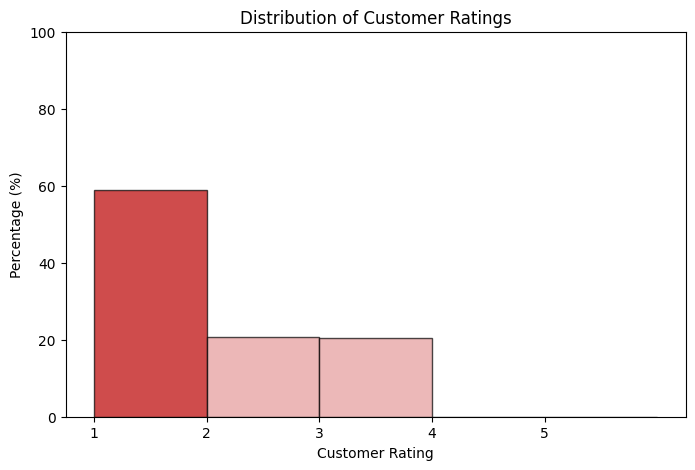

In [85]:
from matplotlib.colors import LinearSegmentedColormap

color_start = '#fbeded'
color_end = '#bb0000'

cmap = LinearSegmentedColormap.from_list('custom_red', [color_start, color_end])

plt.figure(figsize=(8, 5))

n, bins, patches = plt.hist(df['Rating'], bins=range(1, 7), edgecolor='black', alpha=0.7)

total = sum(n)
n_percentage = [(value / total) * 100 for value in n]

for patch, height in zip(patches, n_percentage):
    patch.set_height(height) 
    patch.set_facecolor(cmap(height / max(n_percentage)))

plt.ylim(0, 100)
plt.title('Distribution of Customer Ratings')
plt.xlabel('Customer Rating')
plt.ylabel('Percentage (%)')
plt.xticks(range(1, 6))
plt.show()


`Inference`

The histogram shows that most customer ratings are concentrated in the lower bins (1 to 2), with fewer ratings in the higher bins (2 to 3 and 3 to 4), indicating a __predominance of low ratings__.

C:\Users\Dell\AppData\Local\Temp\ipykernel_25884\4218381248.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  histplot = sns.distplot(df['Rating'])


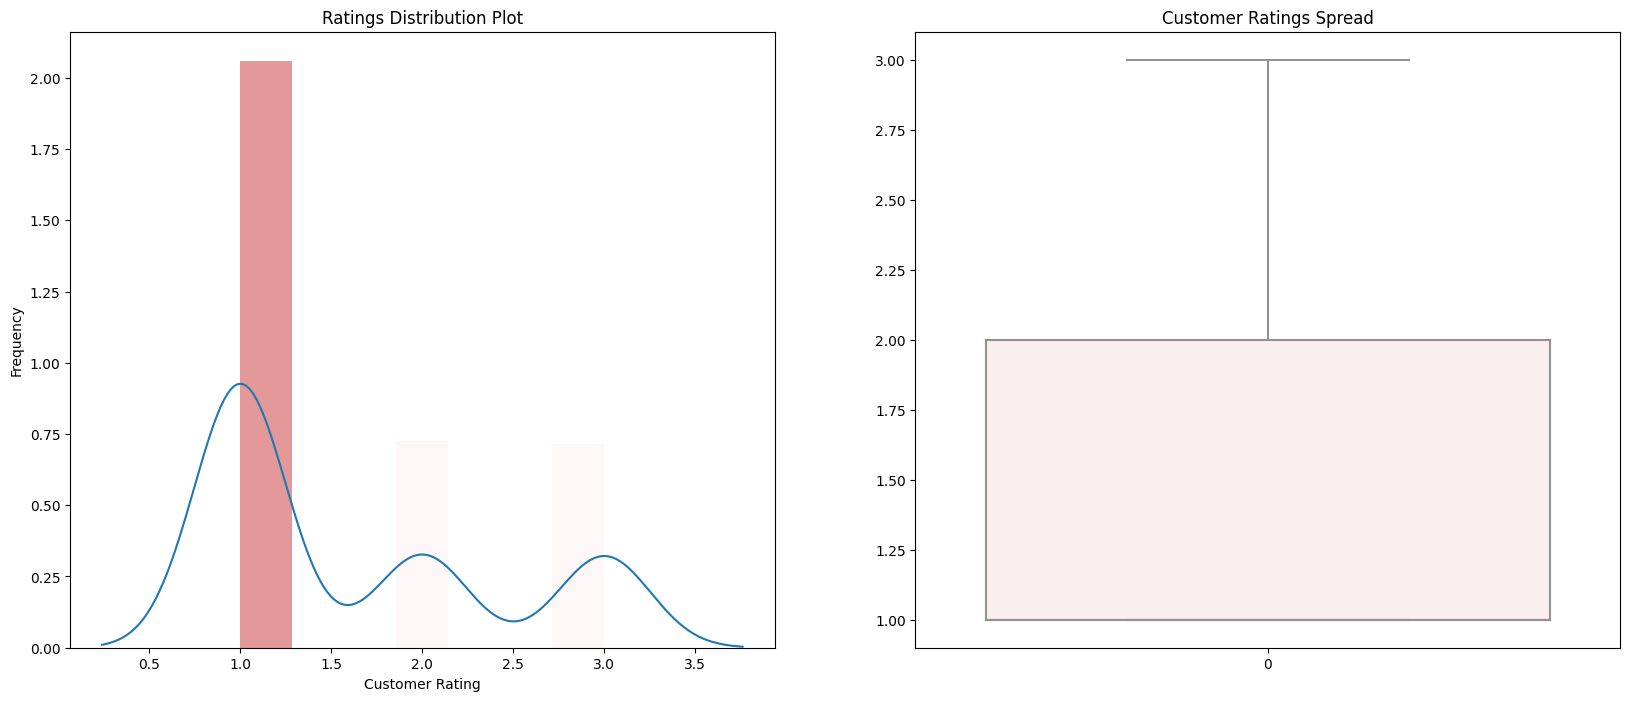

In [86]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.title('Ratings Distribution Plot')

histplot = sns.distplot(df['Rating'])

max_height = histplot.patches[0].get_height()
for patch in histplot.patches:
    if patch.get_height() == max_height:
        patch.set_facecolor(color_end) 
    else:
        patch.set_facecolor(color_start) 

plt.xlabel('Customer Rating')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(df['Rating'], color=color_start)
plt.title('Customer Ratings Spread')

plt.show()

`Inference`
1. **Distribution Plot**: The high density around the rating value 1 and the falling curve indicate that most ratings are concentrated at 1, with fewer ratings as the values increase.

2. **Box Plot**: The box plot shows that the majority of ratings are between 1 and 2, with a few extending up to 3. The presence of an upper tail suggests some higher ratings, but there are no extreme outliers.

## Temporal Analysis

### Tickets Over Time

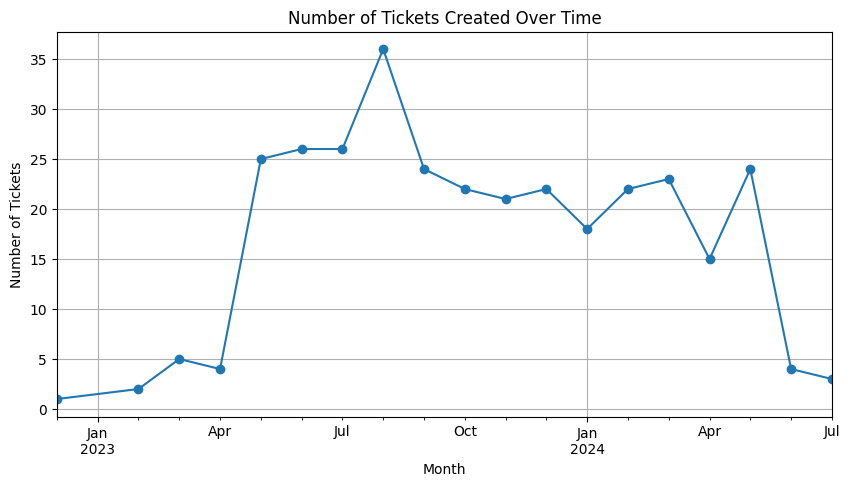

In [87]:
tickets_per_month = df.groupby(df['Created Month'].dt.to_period('M')).size()

plt.figure(figsize=(10, 5))
tickets_per_month.plot(kind='line', marker='o')
plt.title('Number of Tickets Created Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.show()

`Inference`

The number of tickets was low from January 2023 to April 2023, surged from April to July, peaked in August, then declined gradually until January 2024, with a sharp drop from May to July 2024.

In [88]:
max_tickets = tickets_per_month.max()
max_tickets_month = tickets_per_month.idxmax()
print(max_tickets)

36


### Identifying the Peak Time

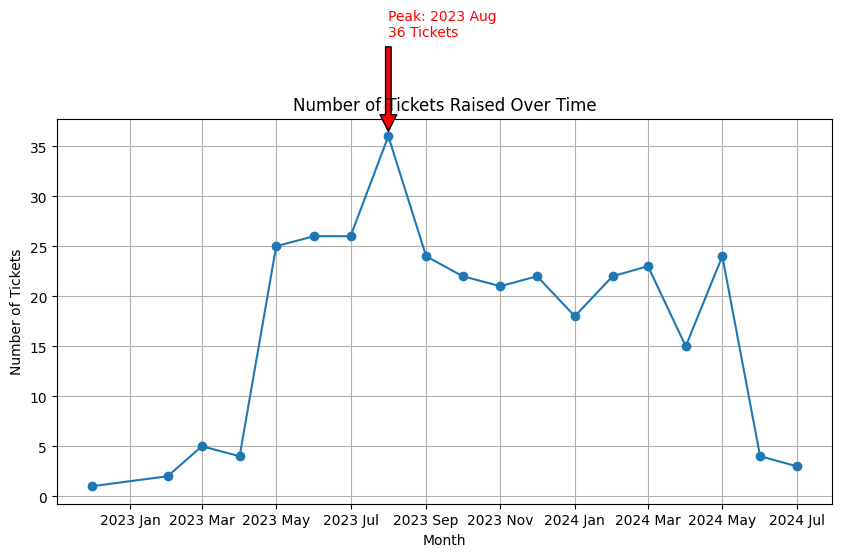

In [89]:
max_tickets = tickets_per_month.max()
max_month = tickets_per_month.idxmax()

plt.figure(figsize=(10, 5))
plt.plot(tickets_per_month.index.to_timestamp(), tickets_per_month.values, marker='o')
plt.title('Number of Tickets Raised Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Tickets')
plt.grid(True)

plt.annotate(f'Peak: {max_month.strftime("%Y %b")}\n{max_tickets} Tickets',
             xy=(max_month.to_timestamp(), max_tickets),
             xytext=(max_month.to_timestamp(), max_tickets + 10),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=10,
             color='red')

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y %b'))

plt.show()


`Inference`

The peak number of tickets found are __36 in August 2023__, which is the highest recorded in the dataset.

In [90]:
df['Created Month'] = pd.to_datetime(df['Created Month'], format='%Y-%m').dt.strftime('%b %Y')

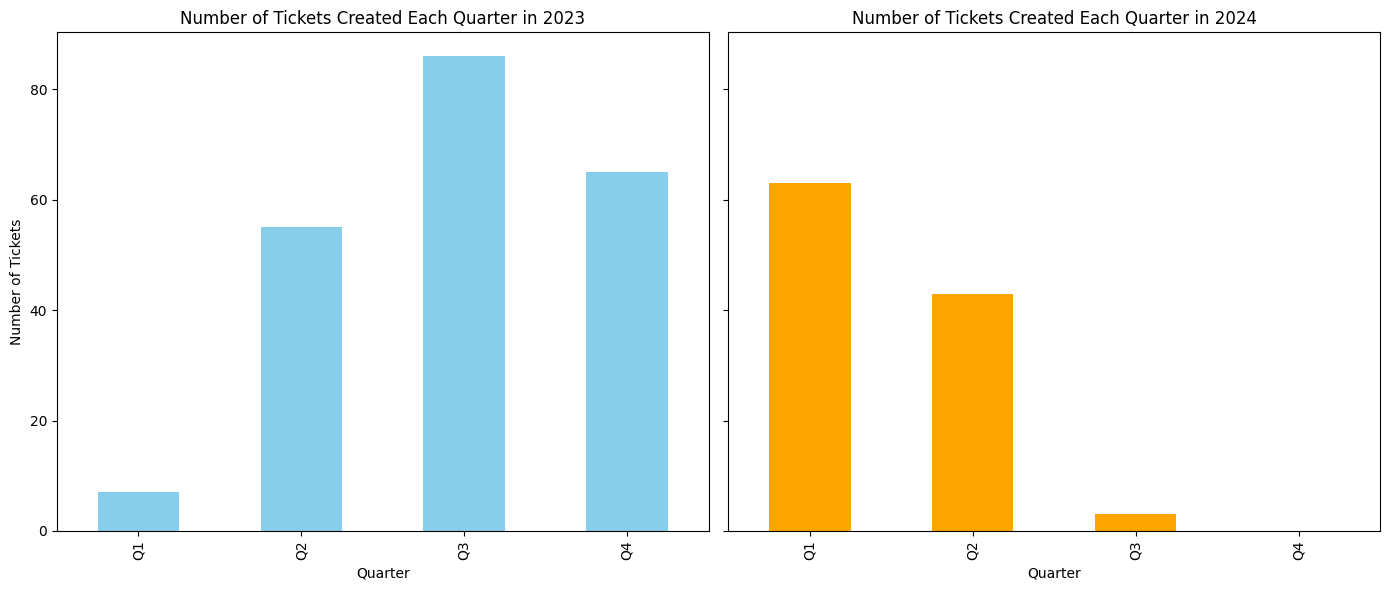

In [91]:
df['Created Month'] = pd.to_datetime(df['Created Month'])
 
df['Year'] = df['Created Month'].dt.year
df['Quarter'] = df['Created Month'].dt.quarter
 
df_filtered_2023 = df[df['Year'] == 2023]
df_filtered_2024 = df[df['Year'] == 2024]
 
ticket_counts_2023 = df_filtered_2023.groupby('Quarter').size().reindex([1, 2, 3, 4], fill_value=0)
ticket_counts_2024 = df_filtered_2024.groupby('Quarter').size().reindex([1, 2, 3, 4], fill_value=0)
 
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
 
ticket_counts_2023.plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Number of Tickets Created Each Quarter in 2023')
ax[0].set_xlabel('Quarter')
ax[0].set_ylabel('Number of Tickets')
ax[0].set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
 
ticket_counts_2024.plot(kind='bar', ax=ax[1], color='orange')
ax[1].set_title('Number of Tickets Created Each Quarter in 2024')
ax[1].set_xlabel('Quarter')
ax[1].set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
 
plt.tight_layout()
plt.show()

In [92]:
peak_month = tickets_per_month.idxmax().strftime('%Y-%m')
peak_month_data = df[df['Created Month'].dt.to_period('M') == peak_month]

agent_support_area = peak_month_data.groupby(['Agent Alias', 'Support Area Path']).size().reset_index(name='Ticket Count')

print(f"Agents who handled tickets in the peak month ({peak_month}):")

print(agent_support_area.to_string(index=False))

Agents who handled tickets in the peak month (2023-08):
       Agent Alias     Support Area Path  Ticket Count
         akhairnar     Device Management             1
 cvg_pun_swjag_css   Teams Rooms Windows             1
           eibeato          Teams Phones             1
    inf_hyd_kiraro   Teams Rooms Windows             1
     inf_hyd_sacku          Teams Phones             1
     inf_hyd_sacku   Teams Rooms Android             1
    inf_hyd_soureh Teams Devices MTR Pro             1
     maa_tuc_antay     Device Management             1
     maa_tuc_brhor          Teams Phones             1
     maa_tuc_brlou           Teams Rooms             1
     maa_tuc_chcof          Teams Phones             1
     maa_tuc_damer   Other Teams Devices             1
     maa_tuc_gemac   Teams Rooms Windows             1
     maa_tuc_islla     Device Management             1
     maa_tuc_islla   Teams Rooms Windows             1
     maa_tuc_jahet   Teams Rooms Windows             1
     maa_

### Agents Handling the Most Tickets During Peak Time

`Inference`

1. In August 2023, a wide variety of agents handled tickets, with no single agent dominating the ticket volume. The distribution of tickets is spread among many agents, each handling a single ticket or a few tickets, except for a few agents with slightly higher counts.


2. The most common support areas included **Teams Rooms Windows, Teams Phones, and Device Management** with several agents handling tickets in these areas.

3. Some agents like **rapunera and shr_ca_gipha** handled multiple tickets (3 and 2 tickets respectively), while others had only one ticket each.

4. The spread of tickets across various agents and support areas suggests a **well-distributed workload** among agents during the peak month. This might reflect an organized approach to ticket management.

5. The peak in August 2023 could be **due to a specific event or issue affecting a significant number of customers**, requiring attention from multiple agents across different support areas.


`Further Investigate`


1. There might have been a major event, software update, or technical issue in August 2023 that led to a sudden increase in ticket volume. We need to investigate if there were any product releases, service disruptions, or other significant events during that period.

2. We need to consider reviewing how tickets were allocated among agents and support areas. If certain areas or agents were overwhelmed, it might be worth examining whether resources could be better distributed or if additional support is needed during peak periods.

3. We need to see if the spike in tickets led to higher stress or slower resolution times, and also we need to assess if additional training or preparation is needed for agents to handle similar spikes more efficiently in the future. 

4. We need to examine if this spike is a recurring pattern annually or seasonally. If so, planning for similar peaks in the future could improve resource management and customer support.


## Categorical Analysis

### Common words in Customer Feedback

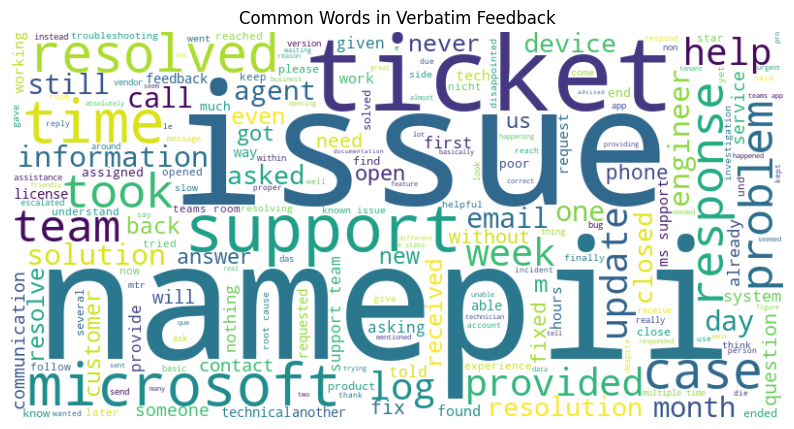

In [93]:
text = ' '.join(df['Verbatim'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Verbatim Feedback')
plt.show()

`Inference`

Key words like "issue," "problem," and "ticket" appear prominently, indicating recurring themes in customer complaints. These insights can help identify common problems that need to be addressed.

### Distribution of Text Lengths

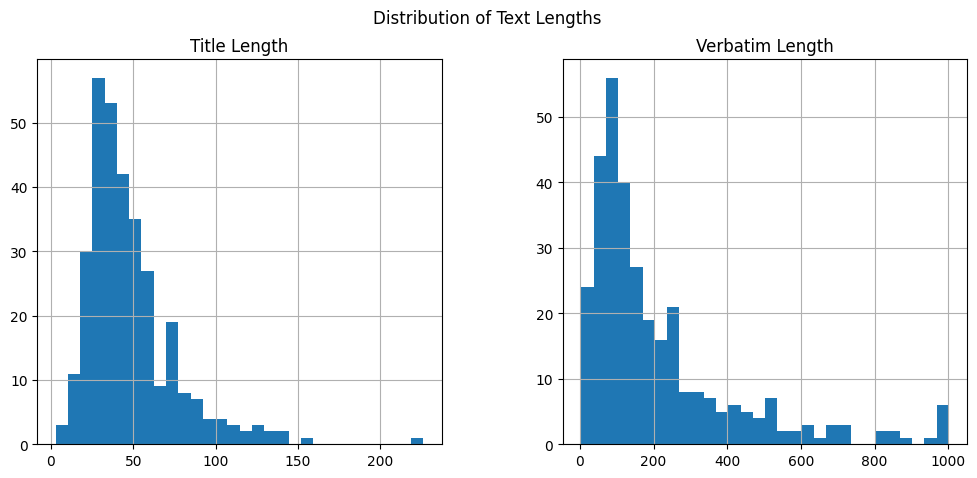

In [94]:
df['Title Length'] = df['Title'].apply(len)
df['Verbatim Length'] = df['Verbatim'].apply(len)
df[['Title Length', 'Verbatim Length']].hist(bins=30, figsize=(12, 5))
plt.suptitle('Distribution of Text Lengths')
plt.show()

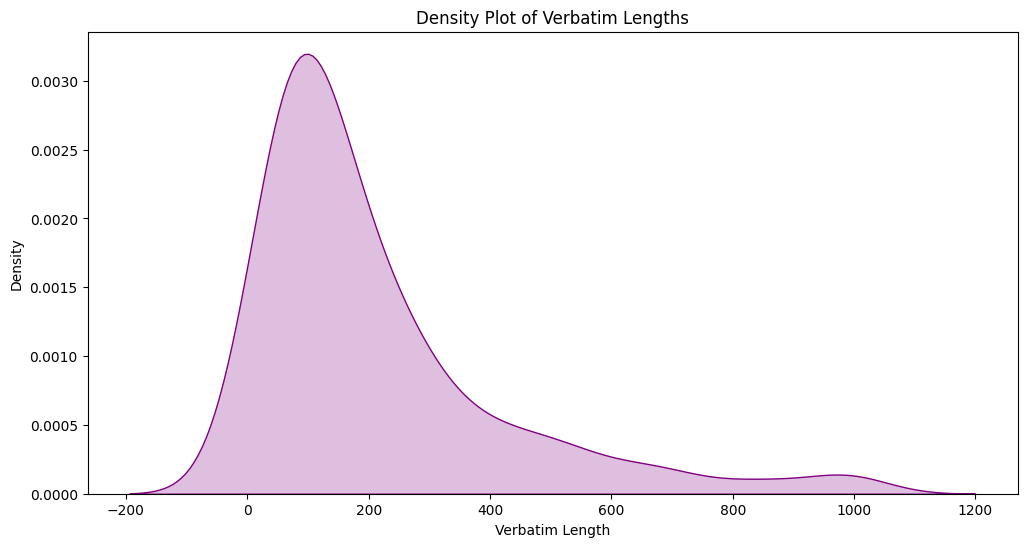

In [95]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df['Verbatim Length'], fill=True, color='purple')
plt.xlabel('Verbatim Length')
plt.ylabel('Density')
plt.title('Density Plot of Verbatim Lengths')
plt.show()

### Support Area Path Analysis

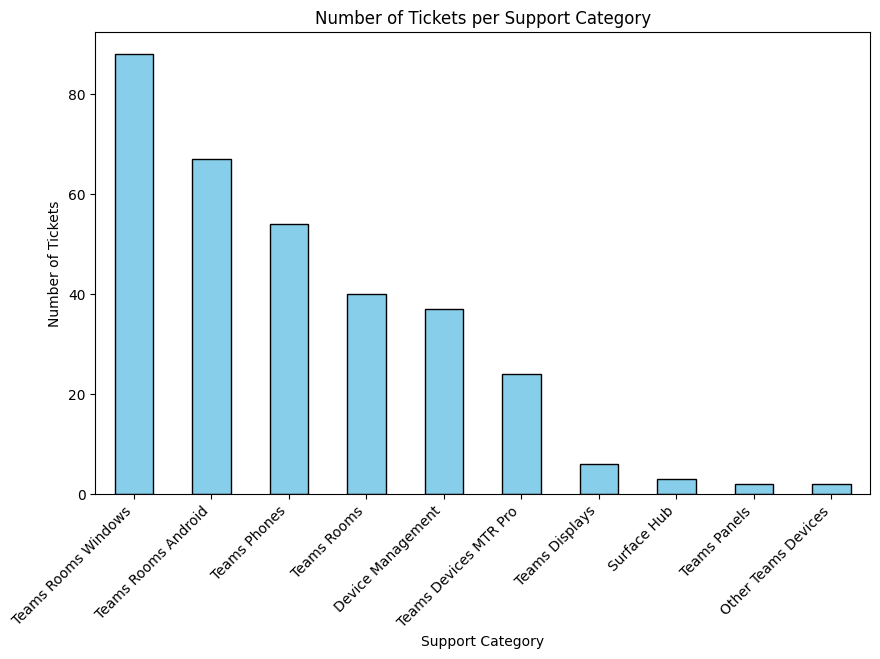

In [96]:
support_category_counts = df['Support Area Path'].value_counts()

plt.figure(figsize=(10, 6))
support_category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Tickets per Support Category')
plt.xlabel('Support Category')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45, ha='right')
plt.show()

`Inference`


This indicates that most support issues are **concentrated in specific categories**, with certain areas receiving significantly more attention.

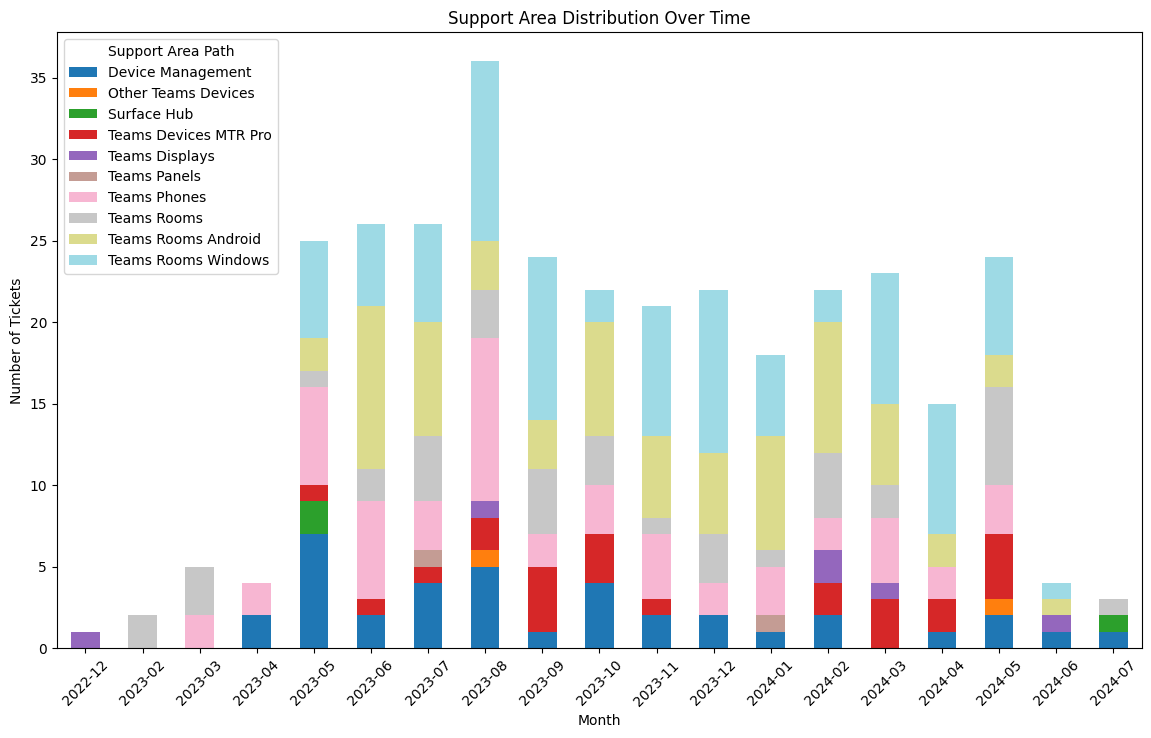

In [97]:
pivot_table = df.pivot_table(index=df['Created Month'].dt.to_period('M').astype(str), columns='Support Area Path', aggfunc='size', fill_value=0)
pivot_table.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.xlabel('Month')
plt.ylabel('Number of Tickets')
plt.title('Support Area Distribution Over Time')
plt.legend(title='Support Area Path')
plt.xticks(rotation=45)
plt.show()

### Understanding the Relationship Between Issue Types and Customer Satisfaction

In [98]:
support_area_performance = df.groupby('Support Area Path').agg(
    average_rating=('Rating', 'mean'),
    ticket_count=('Ticket Number', 'count')
).reset_index()
print(support_area_performance.to_string(index=False))


    Support Area Path  average_rating  ticket_count
    Device Management        1.729730            37
  Other Teams Devices        2.500000             2
          Surface Hub        1.333333             3
Teams Devices MTR Pro        1.416667            24
       Teams Displays        1.500000             6
         Teams Panels        2.000000             2
         Teams Phones        1.444444            54
          Teams Rooms        1.650000            40
  Teams Rooms Android        1.731343            67
  Teams Rooms Windows        1.613636            88


`Inference`

It shows that **Teams Rooms Windows** has the highest ticket count with a __relatively low average rating__, indicating frequent but possibly unsatisfactory support. **Teams Rooms Android** also has a high ticket count with a __slightly higher average rating__. **Other Teams Devices** has the highest average rating but the __fewer tickets__, suggesting better performance in this category. Overall, support performance varies across categories, with some areas handling more tickets but receiving lower ratings.

### Understanding Ticket Priority

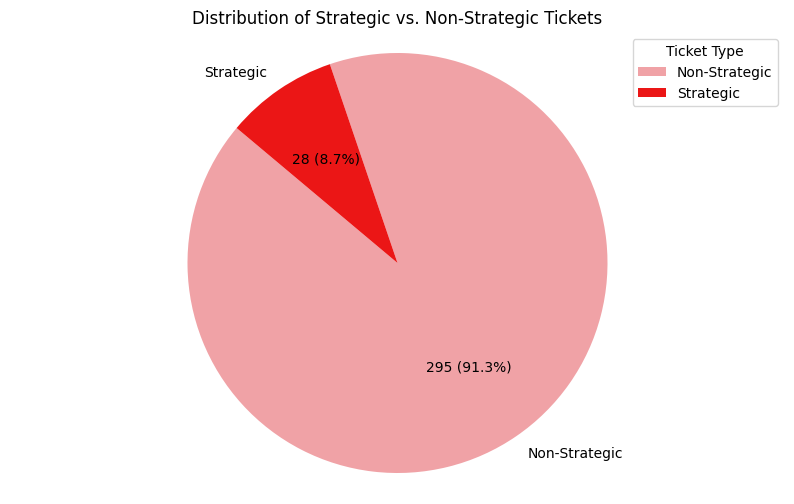

In [99]:
strategic_counts = df['Is Strategic?'].value_counts()

def autopct_with_count(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{count} ({pct:.1f}%)'
    return my_autopct

plt.figure(figsize=(10, 6))
plt.pie(
    strategic_counts, 
    labels=['Non-Strategic', 'Strategic'], 
    autopct=autopct_with_count(strategic_counts), 
    colors=['#f0a2a6', '#eb1616'], 
    startangle=140
)

plt.legend(['Non-Strategic', 'Strategic'], title='Ticket Type', loc='upper right')
plt.title('Distribution of Strategic vs. Non-Strategic Tickets')
plt.axis('equal') 
plt.show()

`Inference`

The pie chart shows that **91.3%** of the tickets are categorized as non-strategic (295 tickets), while **8.7%** are categorized as strategic (28 tickets). This indicates that the majority of tickets are non-strategic.

## Correlation Analysis

In [100]:
df_encoded = pd.get_dummies(df, columns=['Support Area Path'])

correlation_matrix = df_encoded.corr()

rating_correlation = correlation_matrix['Rating'].sort_values(ascending=False)

print("Correlation of Customer Rating with Other Variables:")
print(rating_correlation)

Correlation of Customer Rating with Other Variables:
Rating                                     1.000000
Is Strategic?                              0.106151
Support Area Path_Other Teams Devices      0.086861
Support Area Path_Teams Rooms Android      0.073399
Title Length                               0.072451
Year                                       0.068187
Ticket Number                              0.067677
Support Area Path_Device Management        0.050883
Support Area Path_Teams Panels             0.037726
Support Area Path_Teams Rooms              0.015867
Support Area Path_Teams Rooms Windows     -0.001876
Verbatim Length                           -0.006284
Support Area Path_Teams Displays          -0.019885
Support Area Path_Surface Hub             -0.034085
Support Area Path_Teams Devices MTR Pro   -0.070343
Quarter                                   -0.092365
Support Area Path_Teams Phones            -0.095749
Name: Rating, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_25884\4174086884.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_encoded.corr()


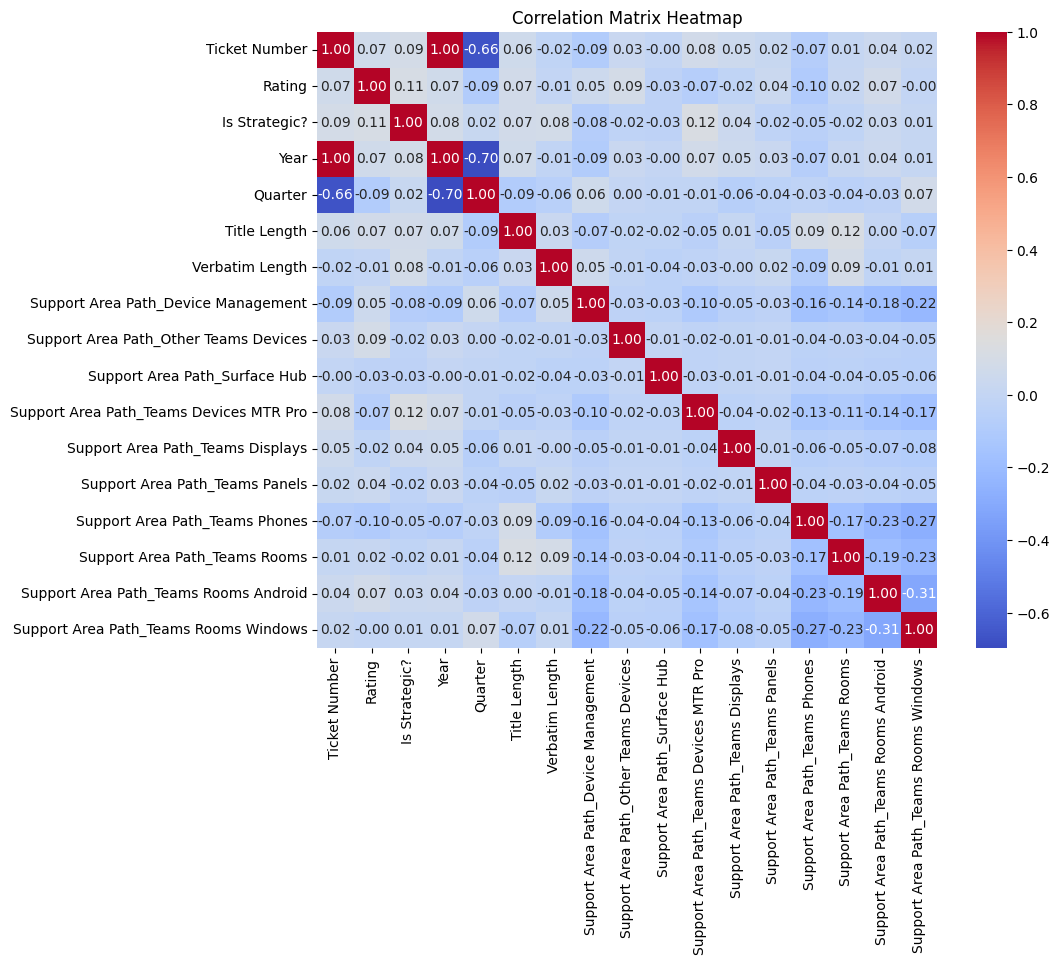

In [101]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

`Inference`

This shows that the customer rating has a **weak positive correlation with most variables**, including being slightly higher for **Is Strategic?** and **Other Teams Devices.** The highest negative correlation is with **Teams Phones**, suggesting that lower ratings are more associated with this support area. Overall, there is __minimal correlation between customer ratings and other variables.__

### Rating Distribution

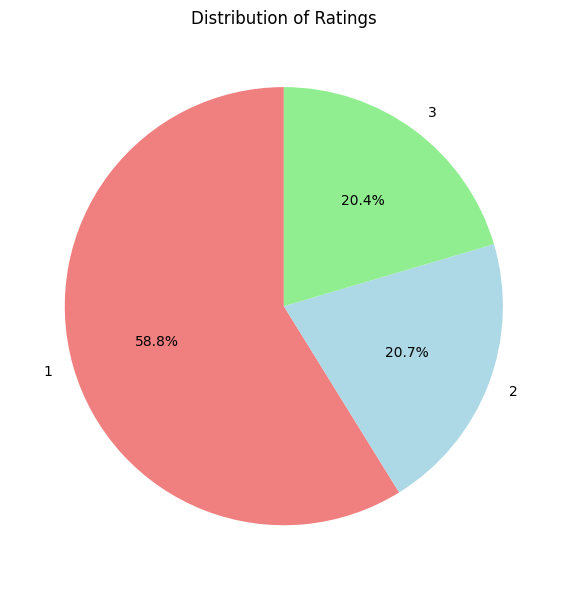

In [102]:
plt.figure(figsize=(8, 6))
df['Rating'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Distribution of Ratings')
plt.ylabel('')
plt.tight_layout()
plt.show()

`Inference`

Rating 1 dominates the chart, suggesting that most customers are dissatisfied with the support they received. Very few tickets received a rating of 3 (high satisfaction).

## Agent Performance Analysis

### Identifying Top and Bottom Performers

In [103]:
agent_performance = df.groupby('Agent Alias')['Rating'].mean().reset_index()

agent_performance_sorted = agent_performance.sort_values(by='Rating', ascending=False)

print(agent_performance_sorted.to_string(index=False))

         Agent Alias   Rating
         Rrabinowitz 3.000000
          v-sarakesh 3.000000
            rapunera 3.000000
          sonakayama 3.000000
         migferreira 3.000000
           manedukha 3.000000
          adlerzhang 3.000000
       maa_tuc_mabur 3.000000
  tpr_ath_darham_css 3.000000
       maa_tuc_dathu 3.000000
               gagar 3.000000
       shr_mtl_brhay 3.000000
   cvg_pun_sanka_css 3.000000
   cvg_pun_jades_css 3.000000
   cvg_pun_chepa_css 3.000000
              jufern 3.000000
wic_sha_angulube_css 3.000000
    cvg_gur_ispa_css 3.000000
            chjaimin 3.000000
           apatrascu 3.000000
       ava_wfh_hahas 3.000000
       ava_tag_phdup 3.000000
       shr_lol_magre 2.666667
       maa_tuc_dahol 2.500000
       maa_tuc_isdur 2.500000
       maa_tuc_brhag 2.333333
        shr_ca_amull 2.250000
       maa_tuc_damer 2.250000
          v-ahowedak 2.000000
         v-rjejurkar 2.000000
       shr_mtl_vinku 2.000000
            luwongca 2.000000
       maa

`Inference`

Most agents have achieved the __highest rating of 3.0__ indicating strong performance, while a small number have lower ratings, suggesting potential areas for improvement.

### Top 10 Agents Analysis

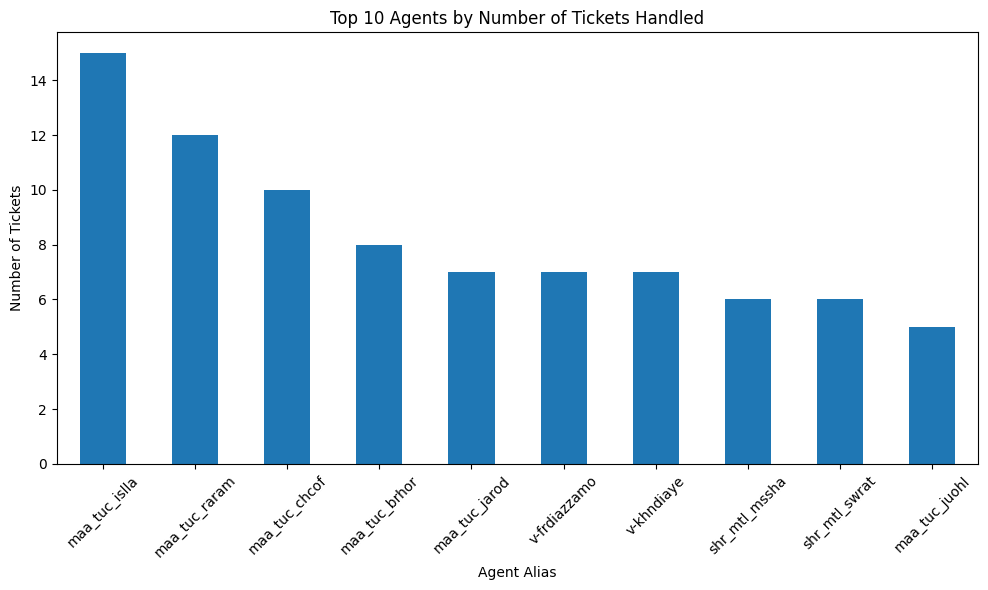

In [104]:
plt.figure(figsize=(10, 6))
df['Agent Alias'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Agents by Number of Tickets Handled')
plt.xlabel('Agent Alias')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


`Inference`

Some agents are handling a significantly higher number of tickets, which may lead to delays in ticket resolution. Proper workload distribution could help improve efficiency and customer satisfaction.

### Is Strategic Analysis

In [105]:
strategic_comparison = df.groupby('Is Strategic?').agg(
    average_rating=('Rating', 'mean'),
    ticket_count=('Ticket Number', 'count')
).reset_index()
print(strategic_comparison.to_string(index=False))


 Is Strategic?  average_rating  ticket_count
             0        1.589831           295
             1        1.892857            28


`Inference`

Strategic tickets have a __higher average rating (1.89)__ compared to non-strategic tickets (1.59), despite the __smaller number of strategic tickets (28 vs. 295).__ This suggests that strategic tickets tend to receive better ratings.

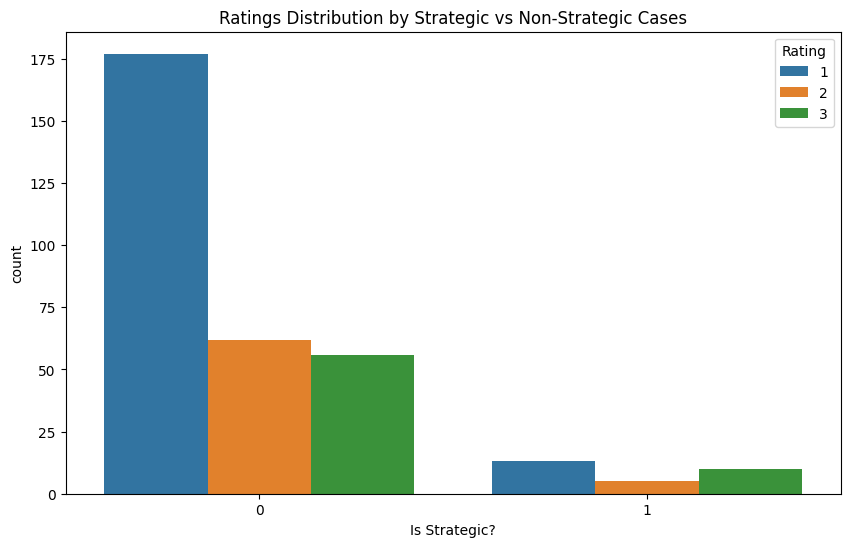

In [106]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Is Strategic?', hue='Rating', data=df)
plt.title('Ratings Distribution by Strategic vs Non-Strategic Cases')
plt.show()

`Summary of Key Findings`

1. **Ticket Volume Trends**: The ticket volume trends show fluctuations across different months, with certain periods experiencing a noticeable increase in customer support needs. This highlights the importance of planning resources accordingly to handle peak demand.
 
2. **Rating Distribution by Support Area**: The distribution of ratings across different support areas shows variability. Some areas receive consistently higher ratings, while others have a more varied range of satisfaction levels. This indicates that customer experience may differ significantly based on the support area.
 
3. **Agent Performance**: There is a noticeable difference in the performance of agents, with some agents receiving consistently higher ratings than others. This suggests a need for focused training and support for underperforming agents to improve the overall quality of service.
 
4. **Common Issues**: The word cloud revealed frequent mentions of recurring problems like "delay," "problem," and "issue" in the feedback provided by customers. These common themes indicate potential areas for improvement in the service delivery process.
 
5. **Proportion of Strategic vs. Non-Strategic Tickets**: There is a balanced split between strategic and non-strategic tickets. However, strategic tickets are not necessarily receiving better ratings, which suggests that high-priority tickets may not be receiving the level of attention they require.


`Recommendations`
 
1. **Focus on Customer Satisfaction**: Priority should be placed on addressing customer dissatisfaction, particularly in the areas mentioned frequently in verbatim feedback such as delays and unresolved issues. Improving response times and providing better solutions can significantly boost satisfaction.
 
2. **Redistribute Workload Among Agents**: The workload should be evenly distributed among agents to prevent overburdening certain team members. Balanced workloads can lead to improved performance and reduce the chances of burnout.
 
3. **Improve Handling of Strategic Tickets**: High-priority, strategic tickets should receive special attention to ensure faster resolution and better customer satisfaction. Handling these tickets differently from regular ones will ensure key customers and business-critical issues are prioritized.
 
4. **Peak Period Resource Allocation**: Since ticket volumes fluctuate, it is crucial to allocate additional resources during periods of high demand to avoid delays and provide timely resolutions. Planning for peak periods can improve response times and reduce the impact of high workloads.


In [107]:
df.to_csv('df_cleaned.csv', index=False)

In [108]:
recurring_issues = df['Support Area Path'].value_counts().reset_index()
recurring_issues.columns = ['Support Area Path', 'Ticket Count']

recurring_issues['Percentage of Total Tickets'] = (recurring_issues['Ticket Count'] / df.shape[0]) * 100

recurring_issues.sort_values(by='Ticket Count', ascending=False)

,Support Area Path,Ticket Count,Percentage of Total Tickets
0,Teams Rooms Windows,88,27.244582
1,Teams Rooms Android,67,20.743034
2,Teams Phones,54,16.718266
3,Teams Rooms,40,12.383901
4,Device Management,37,11.455108
5,Teams Devices MTR Pro,24,7.430341
6,Teams Displays,6,1.857585
7,Surface Hub,3,0.928793
8,Teams Panels,2,0.619195
9,Other Teams Devices,2,0.619195


In [109]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20) 
X = vectorizer.fit_transform(df['Verbatim'])

keywords = vectorizer.get_feature_names_out()

keywords_df = pd.DataFrame(X.toarray(), columns=keywords).sum().reset_index()
keywords_df.columns = ['Keyword', 'Frequency']

keywords_df['Percentage of Total Issues'] = (keywords_df['Frequency'] / df.shape[0]) * 100

keywords_df.sort_values(by='Frequency', ascending=False)

,Keyword,Frequency,Percentage of Total Issues
4,issue,180,55.727554
9,namepii,178,55.108359
14,support,131,40.557276
17,ticket,100,30.959752
7,microsoft,79,24.458204
18,time,70,21.671827
12,resolved,63,19.504644
0,case,56,17.337461
19,took,52,16.099071
1,did,45,13.931889


In [110]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20) 
X = vectorizer.fit_transform(df['Title'])

keywords = vectorizer.get_feature_names_out()

keywords_df = pd.DataFrame(X.toarray(), columns=keywords).sum().reset_index()
keywords_df.columns = ['Keyword', 'Frequency']

keywords_df['Percentage of Total Issues'] = (keywords_df['Frequency'] / df.shape[0]) * 100

keywords_df.sort_values(by='Frequency', ascending=False)

,Keyword,Frequency,Percentage of Total Issues
16,teams,233,72.136223
6,microsoft,81,25.077399
8,namepii,69,21.362229
13,room,65,20.123839
14,rooms,60,18.575851
7,mtr,49,15.170279
9,phone,38,11.764706
12,pro,34,10.526316
2,device,33,10.216718
18,windows,27,8.359133


In [111]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)  
X = vectorizer.fit_transform(df['Verbatim'])

keywords = vectorizer.get_feature_names_out()

keyword_counts = pd.DataFrame(X.toarray(), columns=keywords)
df_with_keywords = pd.concat([df, keyword_counts], axis=1)

combined_analysis = df_with_keywords.groupby('Support Area Path')[keywords].sum().reset_index()

combined_analysis['Total Keyword Frequency'] = combined_analysis[keywords].sum(axis=1)

combined_analysis = combined_analysis.sort_values(by='Total Keyword Frequency', ascending=False)

combined_analysis

,Support Area Path,case,did,help,information,issue,just,logs,microsoft,ms,...,provided,resolved,response,support,team,teams,ticket,time,took,Total Keyword Frequency
9,Teams Rooms Windows,18,14,12,12,53,10,17,25,7,...,16,13,14,37,9,12,26,17,10,373
8,Teams Rooms Android,10,9,6,5,42,4,10,15,10,...,4,10,8,32,10,6,25,16,15,299
7,Teams Rooms,7,8,8,6,26,9,7,14,9,...,7,6,5,18,8,3,11,13,8,204
6,Teams Phones,7,10,7,8,22,7,1,10,4,...,5,11,5,13,1,8,18,9,4,178
0,Device Management,4,3,5,4,18,3,0,10,3,...,2,12,8,14,4,8,13,10,6,155
3,Teams Devices MTR Pro,9,1,0,1,10,1,1,2,1,...,4,7,1,12,6,4,6,4,6,84
4,Teams Displays,1,0,1,0,5,0,0,2,0,...,5,3,0,2,0,3,0,0,2,25
5,Teams Panels,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,1,1,15
1,Other Teams Devices,0,0,0,0,2,0,0,1,0,...,0,1,0,0,0,1,0,0,0,7
2,Surface Hub,0,0,0,0,1,0,0,0,0,...,0,0,0,2,1,0,0,0,0,7


In [112]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)  
X = vectorizer.fit_transform(df['Title'])

keywords = vectorizer.get_feature_names_out()

keyword_counts = pd.DataFrame(X.toarray(), columns=keywords)
df_with_keywords = pd.concat([df, keyword_counts], axis=1)

combined_analysis = df_with_keywords.groupby('Support Area Path')[keywords].sum().reset_index()

combined_analysis['Total Keyword Frequency'] = combined_analysis[keywords].sum(axis=1)

combined_analysis = combined_analysis.sort_values(by='Total Keyword Frequency', ascending=False)

combined_analysis

,Support Area Path,addresspii,alphanumericpii,device,devices,issue,meeting,microsoft,mtr,namepii,...,poly,pro,room,rooms,sign,teams,update,windows,yealink,Total Keyword Frequency
9,Teams Rooms Windows,6,6,9,4,5,11,29,24,14,...,0,8,28,24,8,66,5,19,1,269
8,Teams Rooms Android,2,6,10,3,5,6,16,7,15,...,7,6,13,13,3,48,0,3,4,175
6,Teams Phones,1,4,4,4,4,0,9,0,11,...,5,0,0,1,1,43,3,0,7,142
7,Teams Rooms,2,6,5,2,2,4,7,8,12,...,3,3,7,9,2,23,3,3,4,108
3,Teams Devices MTR Pro,2,2,1,1,3,0,9,7,10,...,0,10,5,8,1,17,2,0,0,80
0,Device Management,2,0,2,1,0,2,11,1,7,...,0,6,11,4,0,26,2,1,0,79
4,Teams Displays,1,0,1,0,0,0,0,2,0,...,1,0,1,1,0,4,0,1,0,12
2,Surface Hub,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,3,0,0,0,4
5,Teams Panels,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,2,0,0,0,4
1,Other Teams Devices,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2


In [113]:
df1 = pd.read_csv('df_cleaned.csv')

In [114]:
df1.head()

,Created Month,Ticket Number,Title,Verbatim,Agent Alias,Support Area Path,Rating,Is Strategic?,Year,Quarter,Title Length,Verbatim Length
0,2023-03-01,2303291420000010,yealink teams rooms sign in issue cannot conne...,délai {namepii} traitement 1 mois d'échanges +...,ava_ceb_reagb,Teams Rooms,1,0,2023,1,57,647
1,2023-05-01,2305230060003330,room panels are not syncing with the resource ...,the support team did not give us a proper reso...,yiliu5,Teams Rooms,1,1,2023,2,54,415
2,2023-06-01,2306300050002650,when a mtr joins a zoom call via {addresspii} ...,the case was raised for more than 2 months and...,maa_tuc_raram,Teams Rooms,1,0,2023,2,103,346
3,2023-07-01,2307050060003170,oem – mtr -a neat {namepii} not receiving vide...,i would like to note that i got some terrible ...,mdt_hyd_akasr_css,Teams Rooms,1,0,2023,3,72,975
4,2023-07-01,2307140050000640,poly x50 cannot connect to microsoft teams room,basically no help received from microsoft side...,shr_mtl_rayad,Teams Rooms,1,0,2023,3,47,101


In [115]:
!pip install googletrans==4.0.0-rc1 pandas

## DASHBOARD

In [116]:
!pip install dash

In [117]:
!pip install dash plotly transformers pandas

In [118]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import plotly.express as px
import pandas as pd
from transformers import pipeline
from collections import Counter
import re

In [119]:
!pip install transformers datasets torch


In [120]:
!pip install --upgrade typing_extensions


In [121]:
!pip install --upgrade torch


In [122]:
!pip install torch torchvision torchaudio


# 1. Install Required Libraries


In [123]:
!pip install scikit-learn nltk


# 2. Load and Preprocess the Data


In [126]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Load the dataset
df = pd.read_excel('Verbatim.xlsx', skiprows=1)  # Skip header if needed
df.columns = ['Created Month', 'Ticket Number', 'Title', 'Verbatim', 'Agent Alias', 'Support Area Path', 'Rating', 'Is Strategic?']

# Preprocessing function to clean the text
def preprocess_text(text):
    text = re.sub(r'\{.*?\}', '', text)  # Remove placeholders like {namepii}
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

# Download stopwords list
nltk.download('stopwords')

# Apply preprocessing to the 'Verbatim' column
df['cleaned_verbatim'] = df['Verbatim'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 3. Latent Dirichlet Allocation (LDA) for Topic Modeling


In [127]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the cleaned text using CountVectorizer
count_vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
X = count_vectorizer.fit_transform(df['cleaned_verbatim'])

# Apply the LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Set n_components to the number of topics
lda.fit(X)

# Function to display topics and their keywords
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Display the top 10 words for each topic
display_topics(lda, count_vectorizer.get_feature_names_out(), 10)


Topic 0:
ticket issue resolved support closed solution open case need microsoft
Topic 1:
support time logs provided case teams received weeks microsoft issue
Topic 2:
issue microsoft took support teams time update device non app
Topic 3:
microsoft issue case time support asked resolution months resolved provided
Topic 4:
support issue time ticket problem took fixed response resolved ms


## What Happens Here?
- The LDA model is trained on the feedback data.
- It generates a set of topics, and each topic consists of keywords that describe it.
- You can change n_components=5 to adjust the number of topics.


# 4. K-Means Clustering for Grouping Feedback


In [128]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the cleaned text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_verbatim'])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Set n_clusters to the number of clusters you want
kmeans.fit(X_tfidf)

# Add cluster labels to the dataframe
df['Cluster'] = kmeans.labels_

# Display the first 5 feedbacks from each cluster
for cluster_num in set(kmeans.labels_):
    print(f"\nCluster {cluster_num} feedback:")
    print(df[df['Cluster'] == cluster_num]['Verbatim'].values[:5])  # Show the first 5 feedbacks in each cluster


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Cluster 0 feedback:
['very disappointed service from microsoft team, call was logged before 3 to 4 months ago and there was no solution or way around provided by the team. they just passing the ticket from one team to another team and they are asking the same evidence from me multiple time and now they have closed the ticket without any solution.'
 "don't close the ticket without solution"
 'The support assistant is absolutely useless. The response is unacceptable; no updates were provided. I tried to reach them several times, but they have not gotten back to me. We managed to figure out our own solution after raising the ticket, but we wanted confirmation from Microsoft support. However, it took them one month to get back to me and they said it was a driver issue, which I had already mentioned to them. They sent an email with a solution that was not provided by them.'
 'reimage of a computer should not be a solution. I need RCA!'
 'No solution for my problems']

Cluster 1 feedback:
[

## What Happens Here?
- K-Means clustering is used to group feedback into 5 clusters (you can change n_clusters).
- Each piece of feedback is assigned to a cluster, and similar feedback will be grouped together.
- The feedback from the first few examples in each cluster is displayed.

### Summary:
- LDA will provide insights into hidden topics within your feedback data.
- K-Means will group similar feedback into clusters, allowing you to see which feedback shares common themes.
- These models will help us to structure and analyze  feedback data without needing labeled data (unsupervised learning). 